IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

LOADING DATASET

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start = start, end=end)

[*********************100%***********************]  1 of 1 completed


FEATURE EXTRACTION


In [3]:
df = df.drop(['Adj Close'], axis = 'columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,93121200


SPLITTING AND TRAINING MODEL

In [6]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = SVR()
model.fit(X_train, y_train)

SVR()

PREDICTING CLOSE VALUES


In [9]:
predicted = model.predict(X_test)
predicted

array([16.66956799, 14.02149249, 16.29006898, 28.26034614, 39.32839203,
       29.73385633, 34.49333211, 16.81496492, 35.1376483 , 14.20874348,
       13.73666939, 33.79600509, 13.73505393, 17.34802191, 31.98896815,
       33.52499287, 13.68795391, 40.07313168, 38.4174807 , 27.36420722,
       23.82991964, 15.85250076, 16.5780523 , 26.24411443, 14.15783789,
       35.22409035, 33.88582825, 32.2661598 , 20.31643852, 14.10241594,
       13.7369761 , 13.84433213, 32.38262614, 31.11907377, 14.58386074,
       27.03649901, 39.35899823, 13.69568687, 28.83770315, 35.2109748 ,
       31.92331358, 40.26854454, 30.33890678, 15.97314339, 22.14942827,
       39.16722694, 16.83220478, 14.14457494, 14.6375865 , 16.30604384,
       17.87257059, 38.27289845, 31.99812908, 25.71119271, 14.1394731 ,
       14.01748159, 13.85218293, 25.89959342, 36.1880291 , 37.45199945,
       41.4325759 , 31.29121455, 36.7263645 , 37.14274685, 36.87687993,
       30.39573881, 37.61164111, 28.55499627, 22.70023821, 37.66

ACCURACY OF MODEL

In [10]:
model.score(X_test, y_test)

0.5935155194717394

PLOTTING ACTUAL CLOSE VS PREDICTED CLOSE 

In [11]:
predicted_close = predicted[:100]
actual_close = y_test[:100]

Text(0.5, 1.0, 'Predicted Close vs. Actual Close for first 100 test cases')

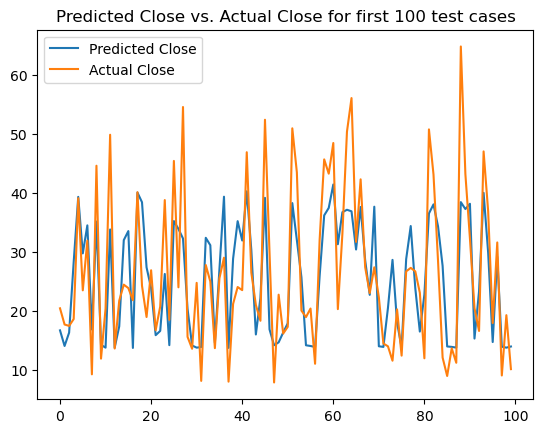

In [12]:
plt.plot(predicted_close, label='Predicted Close')
plt.plot(actual_close, label='Actual Close')
plt.legend()
plt.title('Predicted Close vs. Actual Close for first 100 test cases')